In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import pickle
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_recall_curve, recall_score, roc_curve, precision_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import re
# from androguard.core.bytecodes.apk import APK
# from androguard.core.bytecodes.dvm import DalvikVMFormat
# from androguard.misc import AnalyzeAPK

from mlxtend.plotting import plot_confusion_matrix
from scikitplot.metrics import plot_cumulative_gain, plot_precision_recall, plot_roc_curve

# Load Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train = train.drop('class', axis=1)
y_train = train['class']
X_test = test.drop('class', axis=1)
y_test = test['class']

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12024, 215), (12024,), (2977, 215), (2977,))

In [5]:
X_test.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [6]:
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

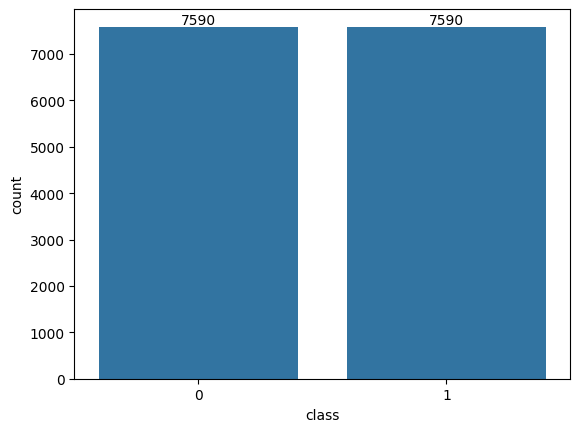

In [7]:
plt.figure()
ax = sns.countplot(x=y_train)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Model

# Logistic Regression

In [8]:
np.random.seed(42)
LogisticRegression_clf = LogisticRegression()
start = time.time()
LogisticRegression_clf.fit(X_train, y_train)
end = time.time()
logreg_time = end - start
print("Logistic Regression Train Time:", logreg_time)

Logistic Regression Train Time: 0.2471907138824463


In [9]:
logreg_pred_train = LogisticRegression_clf.predict(X_train)
logreg_pred_test = LogisticRegression_clf.predict(X_test)

logreg_train_score = accuracy_score(logreg_pred_train, y_train)
logreg_test_score = accuracy_score(logreg_pred_test, y_test)
print("Logistic Regression Train Score:", logreg_train_score)
print("Logistic Regression Test Score:", logreg_test_score)

Logistic Regression Train Score: 0.9814229249011858
Logistic Regression Test Score: 0.982532751091703


In [10]:
logreg_precision_score = precision_score(y_test, logreg_pred_test)
logreg_f1_score = f1_score(y_test, logreg_pred_test)
logreg_recall_score = recall_score(y_test, logreg_pred_test)
logreg_accuracy_score = accuracy_score(y_test, logreg_pred_test)

print("Logistic Regression Precision Score:", logreg_precision_score)
print("Logistic Regression F1 Score:", logreg_f1_score)
print("Logistic Regression Recall Score:", logreg_recall_score)
print("Logistic Regression Accuracy Score:", logreg_accuracy_score)

Logistic Regression Precision Score: 0.9610274579273693
Logistic Regression F1 Score: 0.9765976597659766
Logistic Regression Recall Score: 0.9926806953339433
Logistic Regression Accuracy Score: 0.982532751091703


In [11]:
print(classification_report(y_test, logreg_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1884
           1       0.96      0.99      0.98      1093

    accuracy                           0.98      2977
   macro avg       0.98      0.98      0.98      2977
weighted avg       0.98      0.98      0.98      2977



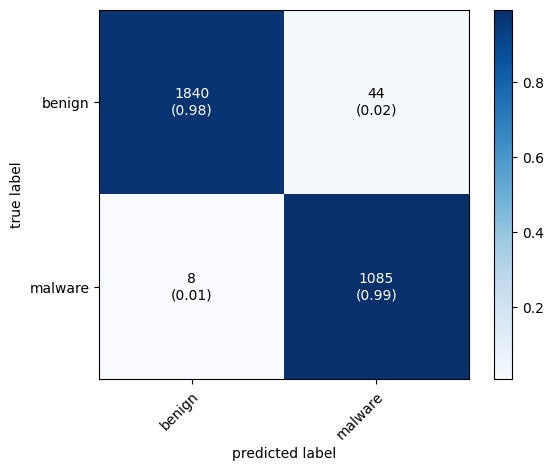

In [12]:
logreg_cm = confusion_matrix(y_test, logreg_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=logreg_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [13]:
logreg_test_proba = LogisticRegression_clf.predict_proba(X_test)

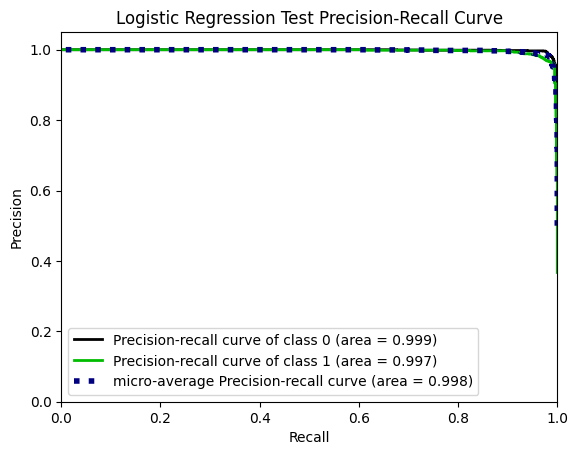

In [14]:
plot_precision_recall(y_test, logreg_test_proba, title="Logistic Regression Test Precision-Recall Curve")
plt.show()

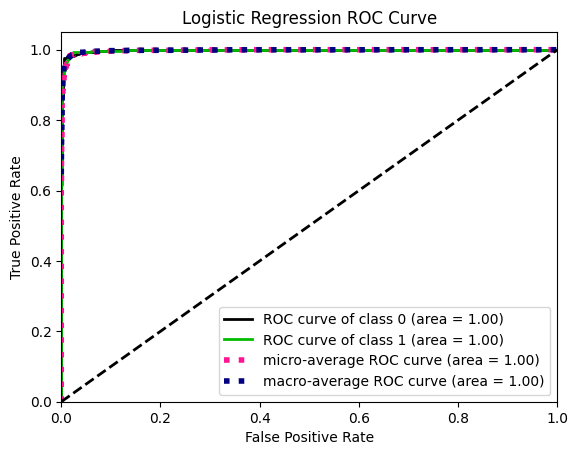

In [15]:
plot_roc_curve(y_test, logreg_test_proba, title="Logistic Regression ROC Curve")
plt.show()

# Random Forestrf = RandomForestClassifier()
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
rf_time = end - start
print("Random Forest Train Time:", rf_time)

In [16]:
np.random.seed(42)
RandomForestClassifier_clf = RandomForestClassifier()
start = time.time()
RandomForestClassifier_clf.fit(X_train, y_train)
end = time.time()
rf_time = end - start
print("Random Forest Train Time:", rf_time)

Random Forest Train Time: 2.7943968772888184


In [17]:
rf_pred_train = RandomForestClassifier_clf.predict(X_train)
rf_pred_test = RandomForestClassifier_clf.predict(X_test)

rf_train_score = accuracy_score(rf_pred_train, y_train)
rf_test_score = accuracy_score(rf_pred_test, y_test)
print("Random Forest Train Score:", rf_train_score)
print("Random Forest Test Score:", rf_test_score)

Random Forest Train Score: 0.9994071146245059
Random Forest Test Score: 0.9929459187101108


In [18]:
rf_precision_score = precision_score(y_test, rf_pred_test)
rf_f1_score = f1_score(y_test, rf_pred_test)
rf_recall_score = recall_score(y_test, rf_pred_test)
rf_accuracy_score = accuracy_score(y_test, rf_pred_test)

print("Random Forest Precision Score:", rf_precision_score)
print("Random Forest F1 Score:", rf_f1_score)
print("Random Forest Recall Score:", rf_recall_score)
print("Random Forest Accuracy Score:", rf_accuracy_score)

Random Forest Precision Score: 0.9944649446494465
Random Forest F1 Score: 0.9903536977491961
Random Forest Recall Score: 0.9862763037511436
Random Forest Accuracy Score: 0.9929459187101108


In [19]:
print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1884
           1       0.99      0.99      0.99      1093

    accuracy                           0.99      2977
   macro avg       0.99      0.99      0.99      2977
weighted avg       0.99      0.99      0.99      2977



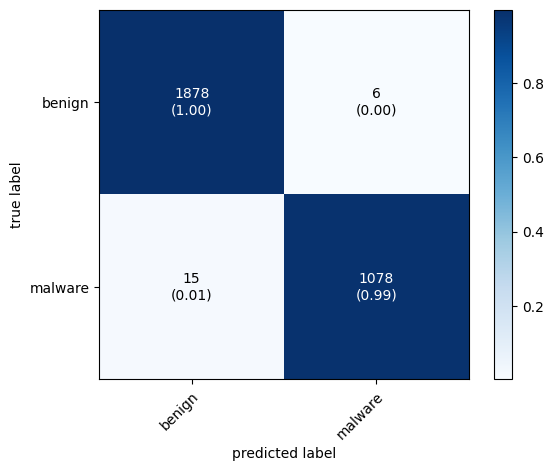

In [20]:
rf_cm = confusion_matrix(y_test, rf_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=rf_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=["benign", "malware"])
plt.show()

In [21]:
rf_test_proba = RandomForestClassifier_clf.predict_proba(X_test)

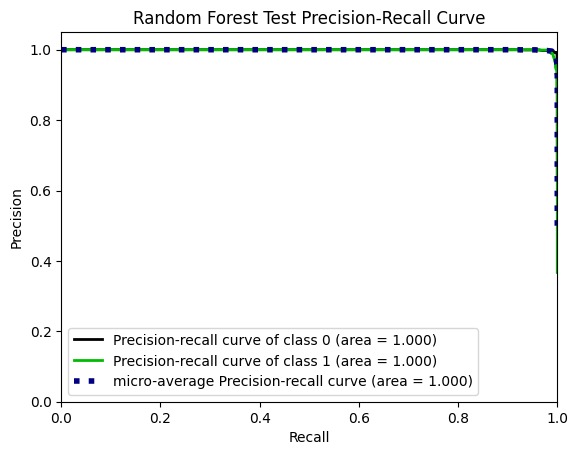

In [22]:
plot_precision_recall(y_test, rf_test_proba, title="Random Forest Test Precision-Recall Curve")
plt.show()

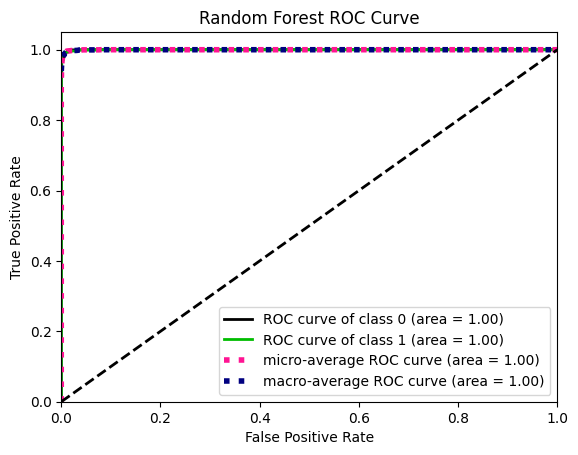

In [23]:
plot_roc_curve(y_test, rf_test_proba, title="Random Forest ROC Curve")
plt.show()

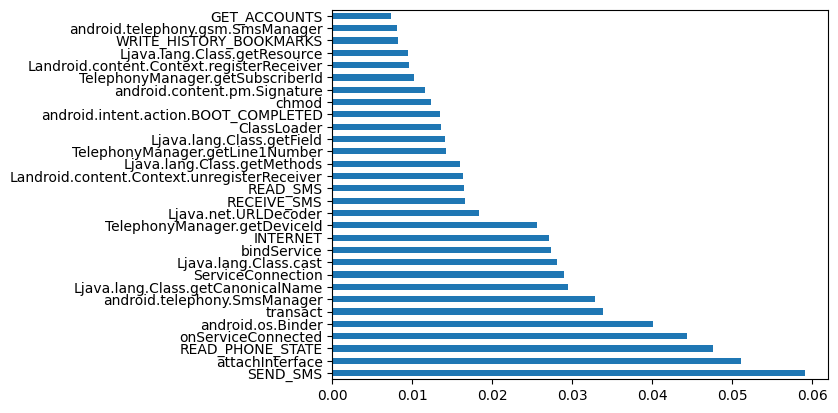

In [24]:
feat_importances = pd.Series(RandomForestClassifier_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

# Ensemble Learning Using Voting Classifier: A Hybrid Model - Random Forest and Logistic Regression

In [25]:
from sklearn.ensemble import VotingClassifier
np.random.seed(42)

# Combine predictions using VotingClassifier
voting_clf_rf_lr = VotingClassifier(estimators=[('RandomForest', RandomForestClassifier_clf), ('LogisticRegression', LogisticRegression_clf)], voting='hard')
voting_clf_rf_lr.fit(X_train, y_train)
voting_pred_test_rf_lr = voting_clf_rf_lr.predict(X_test)

# Evaluate performance
voting_score_rf_lr = accuracy_score(y_test, voting_pred_test_rf_lr)
print("Voting Classifier Test Score:", voting_score_rf_lr)

# Compare with individual models
print("Random Forest Test Score:", accuracy_score(y_test, rf_pred_test))
print("Logistic Regression Test Score:", accuracy_score(y_test, logreg_pred_test))



Voting Classifier Test Score: 0.9932818273429627
Random Forest Test Score: 0.9929459187101108
Logistic Regression Test Score: 0.982532751091703


# Results

In [26]:
labels = ["LogisticRegression", "RandomForest",
          "Hybrid Model - LR & RF"]
scores = [logreg_test_score, rf_test_score, voting_score_rf_lr]

In [27]:
def plot_model_plot(labels, scores):
    plt.figure()
    ax = sns.barplot(x=labels, y=scores)
    ax.set_title("Trained Models Accuracy")
    for container in ax.containers:
        ax.bar_label(container)

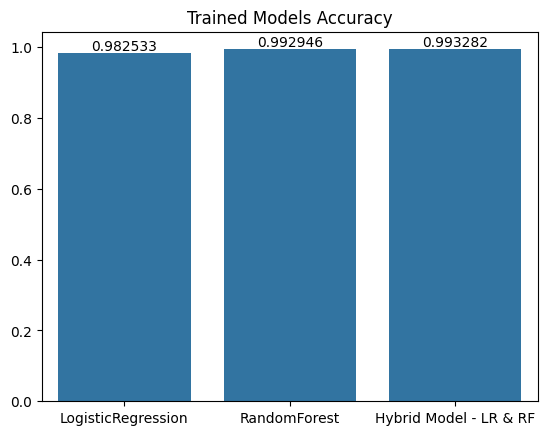

In [28]:
plot_model_plot(labels, scores)
plt.show()

# Ensemble Learning Using Voting Classifier: A Hybrid Model - K Nearest Neighbors and Support Vector Machine

In [29]:
from sklearn.ensemble import VotingClassifier
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
knn_pred_test = knn_clf.predict(X_test)
knn_test_score = accuracy_score(y_test, knn_pred_test)
print("KNN Test Score:", knn_test_score)

svm_clf = svm.SVC(probability=True)
svm_clf.fit(X_train, y_train)
svm_pred_test = svm_clf.predict(X_test)
svm_test_score = accuracy_score(y_test, svm_pred_test)
print("SVM Test Score:", svm_test_score)

# Combine predictions using VotingClassifier
voting_clf_knn_svm = VotingClassifier(estimators=[('KNN', knn_clf), ('SVM', svm_clf)], voting='hard')
voting_clf_knn_svm.fit(X_train, y_train)
voting_pred_test_knn_svm = voting_clf_knn_svm.predict(X_test)

print("Voting Classifier Test Score:", accuracy_score(y_test, voting_pred_test_knn_svm))

KNN Test Score: 0.9899227410144441
SVM Test Score: 0.9892509237487404
Voting Classifier Test Score: 0.9899227410144441


# Results

In [30]:
labels = ["K Nearest Neighbors", "Support Vector Machine",
          "Hybrid Model - KNN & SVM"]
scores = [knn_test_score, svm_test_score, accuracy_score(y_test, voting_pred_test_knn_svm)]

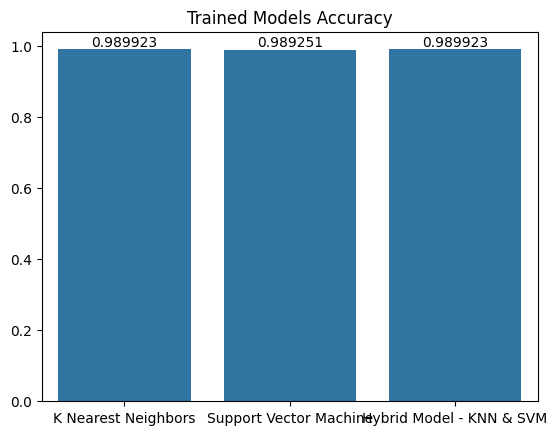

In [31]:
plot_model_plot(labels, scores)
plt.show()

# Ensemble Learning Using Voting Classifier: A Hybrid Model - Gaussian Naive Bayes and Linear Discriminant Analysis

In [32]:
from sklearn.ensemble import VotingClassifier
np.random.seed(42)
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred_test = nb_clf.predict(X_test)
nb_test_score = accuracy_score(y_test, nb_pred_test)
print("Naive Bayes Test Score:", nb_test_score)

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
lda_pred_test = lda_clf.predict(X_test)
lda_test_score = accuracy_score(y_test, lda_pred_test)
print("LDA Test Score:", lda_test_score)

# Combine predictions using VotingClassifier
voting_clf_nb_lda = VotingClassifier(estimators=[('NaiveBayes', nb_clf), ('LDA', lda_clf)], voting='hard')
voting_clf_nb_lda.fit(X_train, y_train)
voting_pred_test_nb_lda = voting_clf_nb_lda.predict(X_test)

print("Voting Classifier Test Score:", accuracy_score(y_test, voting_pred_test_nb_lda))

Naive Bayes Test Score: 0.717836748404434
LDA Test Score: 0.972791400738999
Voting Classifier Test Score: 0.972791400738999


# Results

In [33]:
labels = ["Naive Bayes", "Linear Discriminant Analysis",
          "Hybrid Model - NB & LDA"]

scores = [nb_test_score, lda_test_score, accuracy_score(y_test, voting_pred_test_nb_lda)]

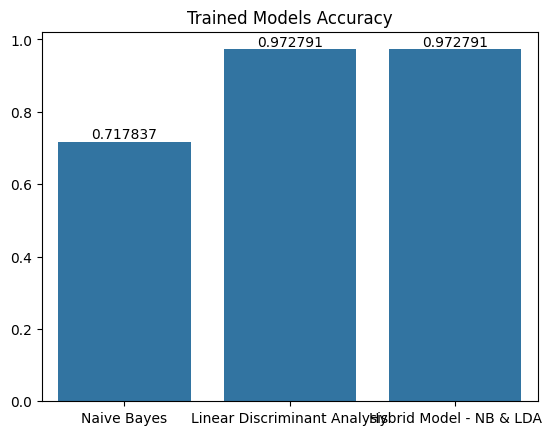

In [34]:
plot_model_plot(labels, scores)
plt.show()

In [35]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

# Train the model using the training data
classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9916022841787034


DNN

In [36]:
# Import necessary libraries
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Print the results
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10


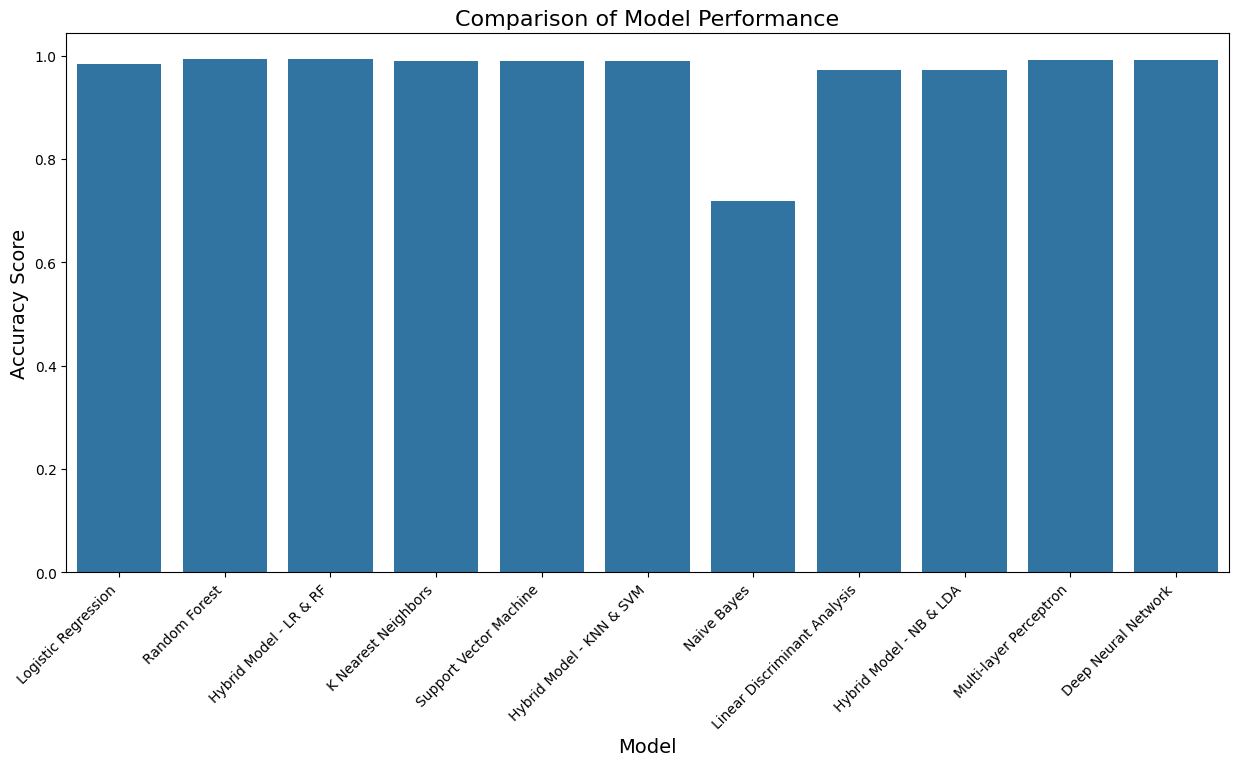

In [ ]:
import matplotlib.pyplot as plt
# Create a list of model names
model_names = ["Logistic Regression", "Random Forest", "Hybrid Model - LR & RF", "K Nearest Neighbors", "Support Vector Machine", "Hybrid Model - KNN & SVM", "Naive Bayes", "Linear Discriminant Analysis", "Hybrid Model - NB & LDA", "Multi-layer Perceptron", "Deep Neural Network"]

# Create a list of corresponding accuracy scores
accuracy_scores = [logreg_test_score, rf_test_score, voting_score_rf_lr, knn_test_score, svm_test_score, accuracy_score(y_test, voting_pred_test_knn_svm), nb_test_score, lda_test_score, accuracy_score(y_test, voting_pred_test_nb_lda), accuracy, accuracy]

# Create the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=model_names, y=accuracy_scores)

# Add title and axis labels
plt.title("Comparison of Model Performance", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
